In [1]:
import gym
import energym

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
########  Random actions  ########

env = gym.make('Eplus-discrete-hot-v1')

for i in range(1):
    obs = env.reset()
    rewards = []
    total_power = []
    temp = []
    out_temp = []
    actions = []
    done = False
    current_month = 0
    while not done:
        a = env.action_space.sample()
        obs, reward, done, info = env.step(a)
        rewards.append(reward)
        total_power.append(info['total_power'])
        temp.append(info['temperature'])
        out_temp.append(info['out_temperature'])
        actions.append(a)
        if info['month'] != current_month: # display results every month
            current_month = info['month']
            print('Reward: ', sum(rewards), info)
    print('Episode ', i, 'Mean reward: ', np.mean(rewards), 'Cumulative reward: ', sum(rewards))
env.close()

[2021-04-13 22:20:28,708] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:20:28,708] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:20:28,708] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:20:28,708] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:20:28,708] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:20:28,708] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:20:28,708] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:20:28,708] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:20:28,708] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Cr

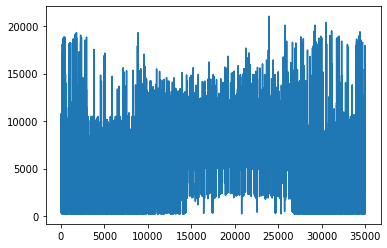

In [41]:
plt.plot(total_power)

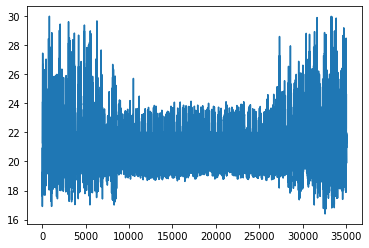

In [42]:
plt.plot(temp)

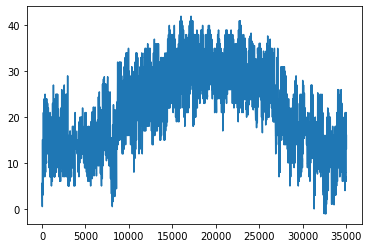

In [43]:
plt.plot(out_temp)

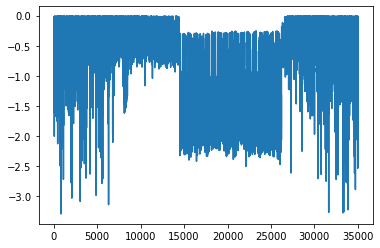

In [44]:
plt.plot(rewards)

(array([3457., 3532., 3388., 3494., 3462., 3535., 3526., 3564., 3466.,
        3616.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

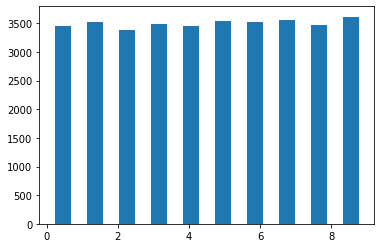

In [45]:
plt.hist(actions, rwidth = 0.5)

In [16]:
########  DQN  ########

# See how long it all takes:
import time
start_time = time.time()


from stable_baselines3 import DQN

# Parameters:
gamma = 0.9
learning_starts = 25000
target_update_interval = 5000
buffer_size = 1000000
exploration_fraction = 0.8
exploration_initial_eps = 1
exploration_final_eps = 0.05
total_timesteps = 250000
eval_freq = 25000

# Create environment:
env = gym.make('Eplus-discrete-hot-v1')

# Create model:
model = DQN("MlpPolicy", env, verbose=1, 
        gamma = gamma,
        learning_starts = learning_starts,
        target_update_interval = target_update_interval,
        buffer_size = buffer_size,
        exploration_fraction = exploration_fraction,
        exploration_initial_eps = exploration_initial_eps,
        exploration_final_eps = exploration_final_eps)

# Train model:
model.learn(total_timesteps = total_timesteps, 
        eval_freq = eval_freq, 
        n_eval_episodes = 1)

model.save("DQN")


env.close()


# Display time taken:
print("--- %s seconds ---" % (time.time() - start_time))

2021-04-13 21:40:02,097] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Last EnergyPlus process has been closed. 
[2021-04-13 21:40:02,097] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Last EnergyPlus process has been closed. 
[2021-04-13 21:40:02,097] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Last EnergyPlus process has been closed. 
[2021-04-13 21:40:02,097] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Last EnergyPlus process has been closed. 
[2021-04-13 21:40:02,097] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Last EnergyPlus process has been closed. 
[2021-04-13 21:40:02,097] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Last EnergyPlus process has been closed. 
[2021-04-13 21:40:02,137] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 21:40:02,137] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 21:40:02,137] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulat

TypeError: unhashable type: 'numpy.ndarray'

In [28]:
# Test model for 1 year:
model = DQN.load("DQN")
env = gym.make('Eplus-discrete-hot-v1')

for i in range(1):
    obs = env.reset()

    rewards = []
    total_power = []
    temp = []
    out_temp = []
    actions = []
    done = False
    current_month = 0

    while not done:
        # Predict next step:
        a, _ = model.predict(obs)
        # Observe next state and reward:
        obs, reward, done, info = env.step(int(a))

        # Store information for plotting:
        rewards.append(reward)
        total_power.append(info['total_power'])
        temp.append(info['temperature'])
        out_temp.append(info['out_temperature'])
        actions.append(a)

        if info['month'] != current_month: # display results every month
            current_month = info['month']
            print('Reward: ', sum(rewards), info)
    print('Episode ', i, 'Mean reward: ', np.mean(rewards), 'Cumulative reward: ', sum(rewards))
env.close()

[2021-04-13 22:13:45,834] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:13:45,834] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:13:45,834] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:13:45,834] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:13:45,834] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:13:45,834] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:13:45,834] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:13:45,834] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:13:45,834] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Cr

11238.62013931632


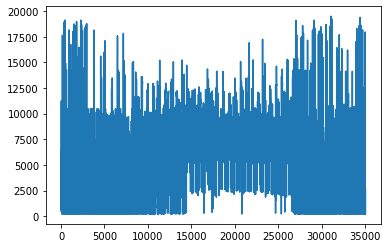

In [39]:
plt.plot(total_power)

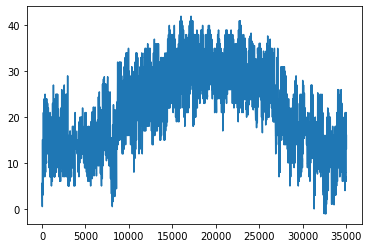

In [33]:
plt.plot(out_temp)

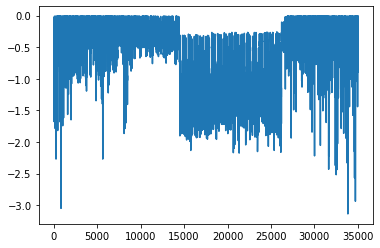

In [29]:
plt.plot(rewards)

(array([ 3554.,  2746.,   897.,   189.,   421.,  3907.,   299., 17684.,
          974.,  4369.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

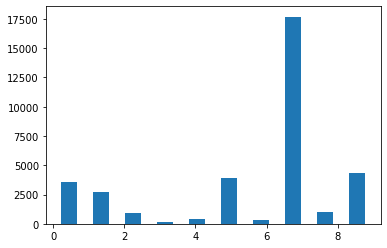

In [32]:
plt.hist([int(i) for i in actions], rwidth = 0.5)

In [46]:
########  A2C  ########

# See how long it all takes:
import time
start_time = time.time()


from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

# Parameters:
gamma = 0.9
total_timesteps = 250000
eval_freq = 25000

# Create environment:
env = make_vec_env('Eplus-discrete-hot-v1', n_envs=4)

# Create model:
model = A2C("MlpPolicy", env, verbose=1, 
        gamma = gamma,)

# Train model:
model.learn(total_timesteps = total_timesteps, 
        eval_freq = eval_freq, 
        n_eval_episodes = 1)

model.save("A2C")

env.close()


# Display time taken:
print("--- %s seconds ---" % (time.time() - start_time))

  |           |
|    ep_len_mean        | 3.5e+04   |
|    ep_rew_mean        | -1.79e+04 |
| time/                 |           |
|    fps                | 387       |
|    iterations         | 9500      |
|    time_elapsed       | 490       |
|    total_timesteps    | 190000    |
| train/                |           |
|    entropy_loss       | -0.000265 |
|    explained_variance | -0.491    |
|    learning_rate      | 0.0007    |
|    n_updates          | 9499      |
|    policy_loss        | 4.81e-06  |
|    value_loss         | 0.0795    |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 3.5e+04   |
|    ep_rew_mean        | -1.79e+04 |
| time/                 |           |
|    fps                | 387       |
|    iterations         | 9600      |
|    time_elapsed       | 495       |
|    total_timesteps    | 192000    |
| train/                |           |
|    entropy_loss       | -0.00026

In [47]:
model = A2C.load("A2C")
env = gym.make('Eplus-discrete-hot-v1')

# Test model for 1 year:
for i in range(1):
    obs = env.reset()

    rewards = []
    total_power = []
    temp = []
    out_temp = []
    actions = []
    done = False
    current_month = 0

    while not done:
        # Predict next step:
        a, _ = model.predict(obs)
        # Observe next state and reward:
        obs, reward, done, info = env.step(int(a))

        # Store information for plotting:
        rewards.append(reward)
        total_power.append(info['total_power'])
        temp.append(info['temperature'])
        out_temp.append(info['out_temperature'])
        actions.append(a)

        if info['month'] != current_month: # display results every month
            current_month = info['month']
            print('Reward: ', sum(rewards), info)
    print('Episode ', i, 'Mean reward: ', np.mean(rewards), 'Cumulative reward: ', sum(rewards))
env.close()

[2021-04-13 22:41:20,175] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:41:20,175] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:41:20,175] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:41:20,175] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:41:20,175] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:41:20,175] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:41:20,175] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:41:20,175] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-04-13 22:41:20,175] EPLUS_ENV_eplus-env-v1_MainThread_ROOT INFO:Cr

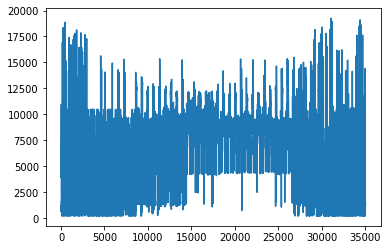

In [48]:
plt.plot(total_power)

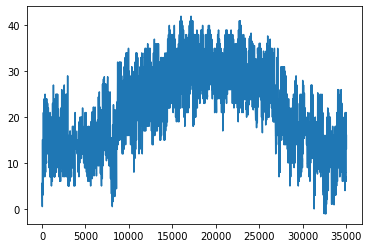

In [49]:
plt.plot(out_temp)

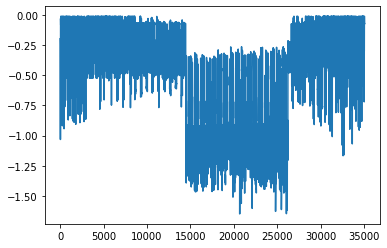

In [50]:
plt.plot(rewards)

(array([3.5039e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ]),
 <BarContainer object of 10 artists>)

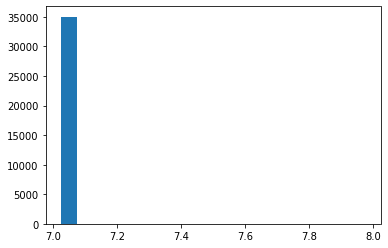

In [58]:
plt.hist([int(i) for i in actions],  rwidth = 0.5)

In [3]:
###### Outdoor temperature plots ######

In [2]:
env = gym.make('Eplus-discrete-hot-v1')

for i in range(1):
    obs = env.reset()
    rewards = []
    hot_out_temp = []
    done = False
    current_month = 0

    while not done:
        a = env.action_space.sample()
        obs, reward, done, info = env.step(a)
        rewards.append(reward)
        hot_out_temp.append(info['out_temperature'])
        
        if info['month'] != current_month: # display results every month
            current_month = info['month']
            print('Reward: ', sum(rewards), info)
    print('Episode ', i, 'Mean reward: ', np.mean(rewards), 'Cumulative reward: ', sum(rewards))
env.close()

[2021-08-30 19:21:16,646] EPLUS_ENV_discrete-hot-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-08-30 19:21:16,650] EPLUS_ENV_discrete-hot-v1_MainThread_ROOT INFO:EnergyPlus working directory is in /workspaces/energym/Eplus-env-discrete-hot-v1-res3/Eplus-env-sub_run1


Reward:  -0.40314488461957476 {'timestep': 900.0, 'day': 1, 'month': 1, 'hour': 0, 'total_power': 1197.281193442195, 'total_power_no_units': -0.11972811934421951, 'comfort_penalty': -0.6865616498949301, 'temperature': 19.31343835010507, 'out_temperature': 4.4}
Reward:  -1199.4529580982446 {'timestep': 2678400.0, 'day': 1, 'month': 2, 'hour': 0, 'total_power': 1978.589971646438, 'total_power_no_units': -0.1978589971646438, 'comfort_penalty': -0.0, 'temperature': 22.00029697465953, 'out_temperature': 12.1}
Reward:  -2087.89246175861 {'timestep': 5097600.0, 'day': 1, 'month': 3, 'hour': 0, 'total_power': 1140.229675800229, 'total_power_no_units': -0.11402296758002291, 'comfort_penalty': -0.00425870166742115, 'temperature': 19.99574129833258, 'out_temperature': 11.9}
Reward:  -2972.7201205130036 {'timestep': 7776000.0, 'day': 1, 'month': 4, 'hour': 0, 'total_power': 2461.758919016124, 'total_power_no_units': -0.2461758919016124, 'comfort_penalty': -0.0, 'temperature': 21.85823469933404, 'o

In [3]:
env = gym.make('Eplus-discrete-mixed-v1')

for i in range(1):
    obs = env.reset()
    rewards = []
    mixed_out_temp = []
    done = False
    current_month = 0

    while not done:
        a = env.action_space.sample()
        obs, reward, done, info = env.step(a)
        rewards.append(reward)
        mixed_out_temp.append(info['out_temperature'])
        
        if info['month'] != current_month: # display results every month
            current_month = info['month']
            print('Reward: ', sum(rewards), info)
    print('Episode ', i, 'Mean reward: ', np.mean(rewards), 'Cumulative reward: ', sum(rewards))
env.close()

[2021-08-30 19:22:34,443] EPLUS_ENV_discrete-mixed-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-08-30 19:22:34,458] EPLUS_ENV_discrete-mixed-v1_MainThread_ROOT INFO:EnergyPlus working directory is in /workspaces/energym/Eplus-env-discrete-mixed-v1-res1/Eplus-env-sub_run1


Reward:  -0.8434833781050137 {'timestep': 900.0, 'day': 1, 'month': 1, 'hour': 0, 'total_power': 8012.581050214761, 'total_power_no_units': -0.8012581050214761, 'comfort_penalty': -0.8857086511885512, 'temperature': 19.11429134881145, 'out_temperature': -9.049999999999999}
Reward:  -1730.091061237641 {'timestep': 2678400.0, 'day': 1, 'month': 2, 'hour': 0, 'total_power': 8644.5745921521, 'total_power_no_units': -0.86445745921521, 'comfort_penalty': -0.6448024871158715, 'temperature': 19.35519751288413, 'out_temperature': -1.2}
Reward:  -3382.4625162605007 {'timestep': 5097600.0, 'day': 1, 'month': 3, 'hour': 0, 'total_power': 6855.496810497654, 'total_power_no_units': -0.6855496810497654, 'comfort_penalty': -0.0, 'temperature': 20.74194971693705, 'out_temperature': 5.5}
Reward:  -4582.563706306702 {'timestep': 7776000.0, 'day': 1, 'month': 4, 'hour': 0, 'total_power': 881.6774027183576, 'total_power_no_units': -0.08816774027183577, 'comfort_penalty': -1.5181707690781394, 'temperature':

In [4]:
env = gym.make('Eplus-discrete-cool-v1')

for i in range(1):
    obs = env.reset()
    rewards = []
    cool_out_temp = []
    done = False
    current_month = 0

    while not done:
        a = env.action_space.sample()
        obs, reward, done, info = env.step(a)
        rewards.append(reward)
        cool_out_temp.append(info['out_temperature'])
        
        if info['month'] != current_month: # display results every month
            current_month = info['month']
            print('Reward: ', sum(rewards), info)
    print('Episode ', i, 'Mean reward: ', np.mean(rewards), 'Cumulative reward: ', sum(rewards))
env.close()

[2021-08-30 19:23:34,874] EPLUS_ENV_discrete-cool-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-08-30 19:23:34,878] EPLUS_ENV_discrete-cool-v1_MainThread_ROOT INFO:EnergyPlus working directory is in /workspaces/energym/Eplus-env-discrete-cool-v1-res1/Eplus-env-sub_run1


Reward:  -0.3300685993689071 {'timestep': 900.0, 'day': 1, 'month': 1, 'hour': 0, 'total_power': 6601.371987378141, 'total_power_no_units': -0.6601371987378142, 'comfort_penalty': -0.0, 'temperature': 20.23123170991624, 'out_temperature': 2.225}
Reward:  -1577.5772698695512 {'timestep': 2678400.0, 'day': 1, 'month': 2, 'hour': 0, 'total_power': 5345.364514684672, 'total_power_no_units': -0.5345364514684672, 'comfort_penalty': -0.11550444051873043, 'temperature': 19.88449555948127, 'out_temperature': 7.0}
Reward:  -2955.4842954709893 {'timestep': 5097600.0, 'day': 1, 'month': 3, 'hour': 0, 'total_power': 6481.496282340046, 'total_power_no_units': -0.6481496282340046, 'comfort_penalty': -0.9278063243899695, 'temperature': 19.07219367561003, 'out_temperature': 3.8}
Reward:  -4041.826420971968 {'timestep': 7776000.0, 'day': 1, 'month': 4, 'hour': 0, 'total_power': 2614.308657634859, 'total_power_no_units': -0.26143086576348595, 'comfort_penalty': -0.0, 'temperature': 21.11064617107454, 'ou

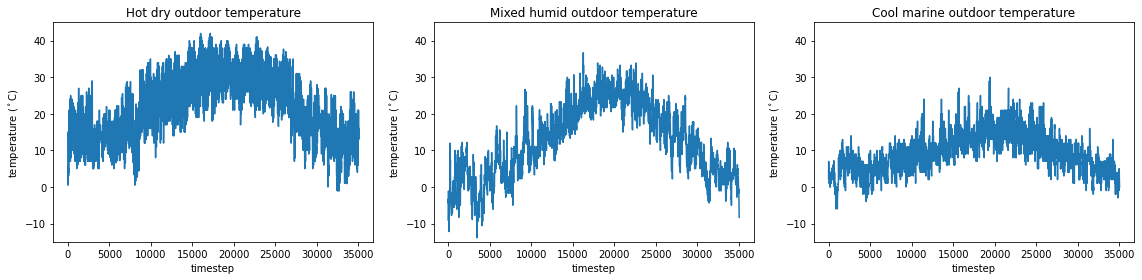

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))

axes[0].plot(hot_out_temp)
axes[0].set_title('Hot dry outdoor temperature')
axes[0].set_xlabel('timestep')
axes[0].set_ylabel('temperature ($^\circ$C)')
axes[0].set_ylim([-15, 45])

axes[1].plot(mixed_out_temp)
axes[1].set_title('Mixed humid outdoor temperature')
axes[1].set_xlabel('timestep')
axes[1].set_ylabel('temperature ($^\circ$C)')
axes[1].set_ylim([-15, 45])

axes[2].plot(cool_out_temp)
axes[2].set_title('Cool marine outdoor temperature')
axes[2].set_xlabel('timestep')
axes[2].set_ylabel('temperature ($^\circ$C)')
axes[2].set_ylim([-15, 45])


plt.tight_layout()

plt.savefig('project_images/outdoor_temperatures.png')

In [15]:
#####  Track comfort penalty  #####

#  --> absolute difference to temperature comfort, where: range_comfort_winter=(20.0, 23.5) and range_comfort_summer=(23.0, 26.0)

env = gym.make('Eplus-discrete-hot-v1')

comfort_penalties = []

for i in range(1):
    obs = env.reset()
    rewards = []
    done = False
    current_month = 0
    out_temp = []

    while not done:
        a = env.action_space.sample()
        obs, reward, done, info = env.step(a)
        rewards.append(reward)
        out_temp.append(info['out_temperature'])
        comfort_penalties.append(info['comfort_penalty'])
        
        if info['month'] != current_month: # display results every month
            current_month = info['month']
            print('Reward: ', sum(rewards), info)
    print('Episode ', i, 'Mean reward: ', np.mean(rewards), 'Cumulative reward: ', sum(rewards))
env.close()


[2021-05-23 20:53:21,863] EPLUS_ENV_discrete-hot-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-05-23 20:53:21,863] EPLUS_ENV_discrete-hot-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-05-23 20:53:21,863] EPLUS_ENV_discrete-hot-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-05-23 20:53:21,863] EPLUS_ENV_discrete-hot-v1_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2021-05-23 20:53:21,898] EPLUS_ENV_discrete-hot-v1_MainThread_ROOT INFO:EnergyPlus working directory is in /workspaces/energym/Eplus-env-discrete-hot-v1-res7/Eplus-env-sub_run1
[2021-05-23 20:53:21,898] EPLUS_ENV_discrete-hot-v1_MainThread_ROOT INFO:EnergyPlus working directory is in /workspaces/energym/Eplus-env-discrete-hot-v1-res7/Eplus-env-sub_run1
[2021-05-23 20:53:21,898] EPLUS_ENV_discrete-hot-v1_MainThread_ROOT INFO:EnergyPlus working directory is in /workspaces/energym/Eplus-env-discrete-hot-v1-res7/Eplus-env

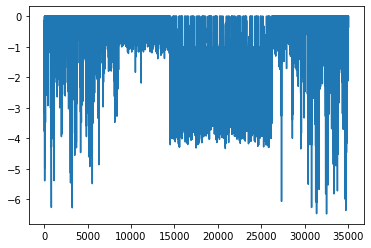

In [17]:
plt.plot(comfort_penalties)

In [18]:
comfort_penalty_times = [0 if (x == 0) else 1 for x in comfort_penalties]

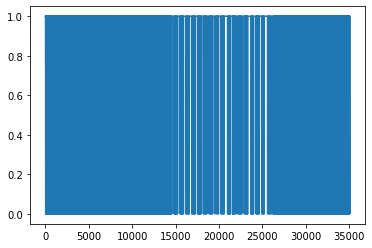

In [19]:
plt.plot(comfort_penalty_times)

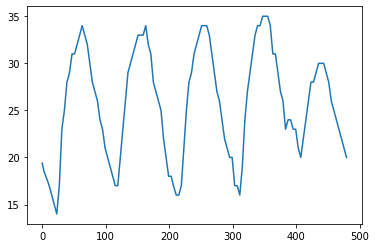

In [23]:
plt.plot(out_temp[100*96:105*96])

In [ ]:
# recordings start at midnight